# Task 1: Web Scraping to Gain Company Insights

In [51]:
#importing libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd

## Scraping data from Skytrax


In [52]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [53]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...


In [54]:
df

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...
...,...
995,✅ Trip Verified | Mahe to Stockholm via London...
996,✅ Trip Verified | Glasgow to Tampa via Gatwic...
997,Not Verified | Orlando to Gatwick. Travelling...
998,✅ Trip Verified | London to Abu Dhabi. This i...


In [55]:
if not os.path.exists(os.path.join(os.getcwd(), "data")):
    os.mkdir("data")

df.to_csv("data/BA_reviews_raw.csv")

## Step 1: Data Cleaning

In [56]:
df["reviews"] = df["reviews"].str.split("|", expand=True)[1]
df.head()

,reviews
0,Flight mainly let down by a disagreeable fl...
1,Another awful experience by British Airways...
2,"The service was rude, full of attitude to m..."
3,This flight was a joke. There was four peop...
4,This time British Airways managed to get ev...


In [57]:
import string

def case_and_punctuation_handling(text):
    lower_case_text = text.lower()
    cleaned_text = lower_case_text.translate(str.maketrans("", "", string.punctuation))
    return cleaned_text

df["cleaned_reviews"] = df["reviews"].apply(case_and_punctuation_handling)
df.head()

,reviews,cleaned_reviews
0,Flight mainly let down by a disagreeable fl...,flight mainly let down by a disagreeable fl...
1,Another awful experience by British Airways...,another awful experience by british airways...
2,"The service was rude, full of attitude to m...",the service was rude full of attitude to me...
3,This flight was a joke. There was four peop...,this flight was a joke there was four peopl...
4,This time British Airways managed to get ev...,this time british airways managed to get ev...


## Step 2: Tokenization, Stopwords removal, and POS-tagging

In [58]:
import nltk

# Downloading all nltk packages to avoid compatibility issues.
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI

True

In [59]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet

In [60]:
# POS tagging dictionary.
pos_dict = {"J":wordnet.ADJ, "V":wordnet.VERB, "N":wordnet.NOUN, "R":wordnet.ADV}

def handle_tokenization_stopwords_postags(text):
    # Tokenization.
    tokenized_text = word_tokenize(text)
    # POS-tagging.
    tags = pos_tag(tokenized_text)
    new_text_list = []
    for word, tag in tags:
        # Stopword removal.
        if word not in stopwords.words("english"):
          new_text_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_text_list

df["POS_tagged_reviews"] = df["cleaned_reviews"].apply(handle_tokenization_stopwords_postags)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews
0,Flight mainly let down by a disagreeable fl...,flight mainly let down by a disagreeable fl...,"[(flight, n), (mainly, r), (let, v), (disagree..."
1,Another awful experience by British Airways...,another awful experience by british airways...,"[(another, None), (awful, a), (experience, n),..."
2,"The service was rude, full of attitude to m...",the service was rude full of attitude to me...,"[(service, n), (rude, a), (full, a), (attitude..."
3,This flight was a joke. There was four peop...,this flight was a joke there was four peopl...,"[(flight, n), (joke, n), (four, None), (people..."
4,This time British Airways managed to get ev...,this time british airways managed to get ev...,"[(time, n), (british, a), (airways, n), (manag..."


## Step 3: Lemmatization

In [61]:
# Obtaining stem-words with Lemmatization.
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def text_lemmatization(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df["lemmatized_reviews"] = df["POS_tagged_reviews"].apply(text_lemmatization)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews,lemmatized_reviews
0,Flight mainly let down by a disagreeable fl...,flight mainly let down by a disagreeable fl...,"[(flight, n), (mainly, r), (let, v), (disagree...",flight mainly let disagreeable flight attend...
1,Another awful experience by British Airways...,another awful experience by british airways...,"[(another, None), (awful, a), (experience, n),...",another awful experience british airway flig...
2,"The service was rude, full of attitude to m...",the service was rude full of attitude to me...,"[(service, n), (rude, a), (full, a), (attitude...",service rude full attitude food poorly servi...
3,This flight was a joke. There was four peop...,this flight was a joke there was four peopl...,"[(flight, n), (joke, n), (four, None), (people...",flight joke four people business class inclu...
4,This time British Airways managed to get ev...,this time british airways managed to get ev...,"[(time, n), (british, a), (airways, n), (manag...",time british airway manage get everything ri...


## Step 4: Sentiment Analysis (VADER)

In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_analysis(sentiment_text):
    score = analyzer.polarity_scores(sentiment_text)
    return score["compound"]

df["VADER_compound_score"] = df["lemmatized_reviews"].apply(vader_analysis)

# function to analyse
def sentiment_classifier(compound_score):
    if compound_score >= 0.5:
        return "Positive"
    elif compound_score < 0 :
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["VADER_compound_score"].apply(sentiment_classifier)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews,lemmatized_reviews,VADER_compound_score,Sentiment
0,Flight mainly let down by a disagreeable fl...,flight mainly let down by a disagreeable fl...,"[(flight, n), (mainly, r), (let, v), (disagree...",flight mainly let disagreeable flight attend...,0.8860,Positive
1,Another awful experience by British Airways...,another awful experience by british airways...,"[(another, None), (awful, a), (experience, n),...",another awful experience british airway flig...,-0.8316,Negative
2,"The service was rude, full of attitude to m...",the service was rude full of attitude to me...,"[(service, n), (rude, a), (full, a), (attitude...",service rude full attitude food poorly servi...,-0.6437,Negative
3,This flight was a joke. There was four peop...,this flight was a joke there was four peopl...,"[(flight, n), (joke, n), (four, None), (people...",flight joke four people business class inclu...,-0.2960,Negative
4,This time British Airways managed to get ev...,this time british airways managed to get ev...,"[(time, n), (british, a), (airways, n), (manag...",time british airway manage get everything ri...,0.9831,Positive


In [63]:
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts

,count
Sentiment,
Positive,451
Negative,443
Neutral,106


In [64]:
df.to_csv("data/BA_reviews_analysed.csv")

## Data Vizualization: Pie-Chart

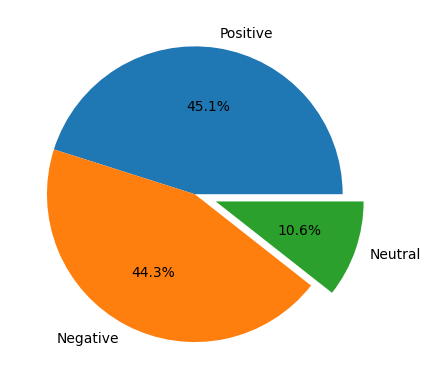

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Declaring data.
data = sentiment_counts.values

# Define Seaborn color palette to use.
palette_color = sns.color_palette()

# Plotting data on chart.
plt.pie(data, labels=sentiment_counts.index, colors=palette_color, explode = (0, 0, 0.15), autopct="%.1f%%")

# Displaying chart.
plt.show()

## Data Vizualization: Word Cloud

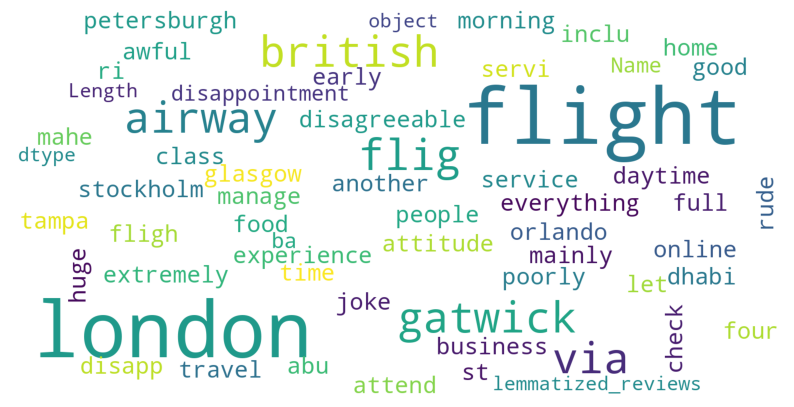

In [66]:
from wordcloud import WordCloud

def vizualize_wordcloud(data):
    wordcloud = WordCloud(background_color="white", max_words=200, max_font_size=40, scale=4, relative_scaling=0.9, random_state=7)
    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis("off")

    plt.imshow(wordcloud)
    plt.show()

vizualize_wordcloud(df["lemmatized_reviews"])